In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

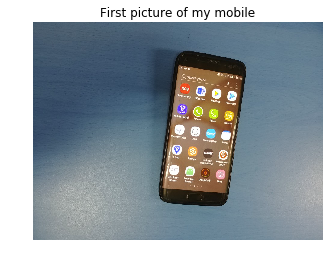

In [12]:
image1 = cv2.imread("image1.jpg")
image2 = cv2.imread("image2.jpg")
           
plt.imshow(image1)           
plt.axis('off')
plt.title("First picture")
plt.show()

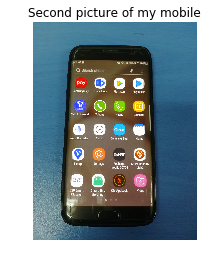

In [13]:
plt.imshow(image2)           
plt.axis('off')
plt.title("Second picture")
plt.show()

In [14]:
# 1) Check if 2 images are equals
if image1.shape == image2.shape:
    print("The images have same size and channels")
    difference = cv2.subtract(image1, image2)
    b, g, r = cv2.split(difference)
    if cv2.countNonZero(b) == 0 and cv2.countNonZero(g) == 0 and cv2.countNonZero(r) == 0:
        print("The images are completely Equal")
    else:
        print("The images are NOT equal")

Keypoints 1ST Image: 557
Keypoints 2ND Image: 1029
GOOD Matches: 159
How good it's the match:  28.545780969479356


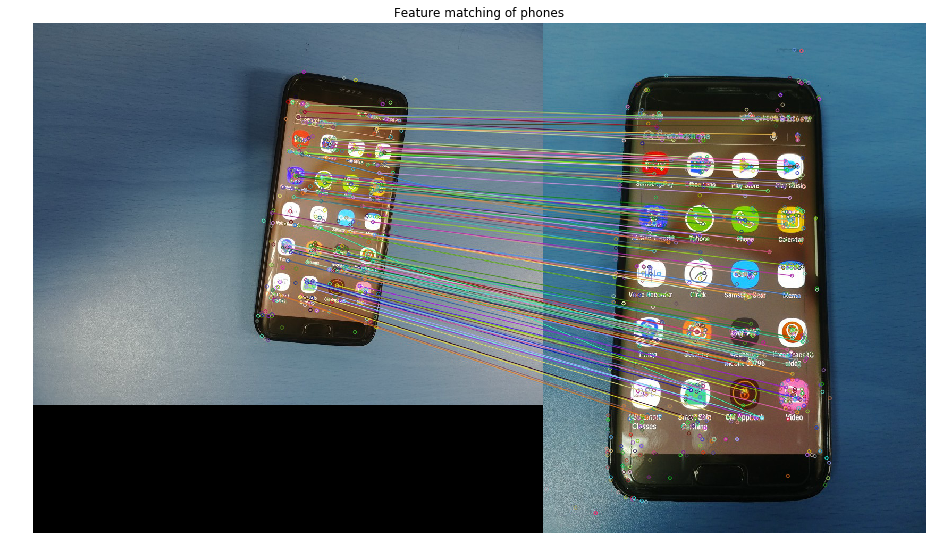

In [16]:
# 2) Check for similarities between the 2 images
sift = cv2.xfeatures2d.SIFT_create()
kp_1, desc_1 = sift.detectAndCompute(image1, None)
kp_2, desc_2 = sift.detectAndCompute(image2, None)
index_params = dict(algorithm=0, trees=5)
search_params = dict()
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(desc_1, desc_2, k=2)
good_points = []
for m, n in matches:
    if m.distance < 0.6*n.distance:
        good_points.append(m)
# Define how similar they are
number_keypoints = 0
if len(kp_1) <= len(kp_2):
    number_keypoints = len(kp_1)
else:
    number_keypoints = len(kp_2)
print("Keypoints 1ST Image: " + str(len(kp_1)))
print("Keypoints 2ND Image: " + str(len(kp_2)))
print("GOOD Matches:", len(good_points))
print("How good it's the match: ", len(good_points) / number_keypoints * 100)
result = cv2.drawMatches(image1, kp_1, image2, kp_2, good_points, None)
cv2.imshow("result", cv2.resize(result, None, fx=0.4, fy=0.4))
cv2.imwrite("feature_matching_of_images.jpg", result)
cv2.imshow("Original", cv2.resize(image1, None, fx=0.4, fy=0.4))
cv2.imshow("Duplicate", cv2.resize(image2, None, fx=0.4, fy=0.4))
#cv2.waitKey(0)

feature_matching_of_images = cv2.imread("feature_matching_of_images.jpg")

plt.figure()
plt.rcParams["figure.figsize"] = (16,25)
plt.imshow(feature_matching_of_images)    
plt.axis('off')
plt.title("Feature matching of images")
plt.show()
cv2.destroyAllWindows()